In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('NanoFab/SiO2 thickness (Ellipsometer).xlsx')

Time = []
Thickness = []

for i in range(3,7):
    Time.append(df.iloc[i,0])
#print(Time)

for i in range(3,7):
    Thickness.append(df.iloc[i,1])
#print(Thickness)

In [6]:
# plot based on the excel data

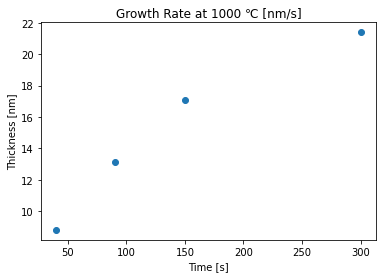

In [7]:
plt.scatter(Time,Thickness)

plt.xlabel("Time [s]")
plt.ylabel("Thickness [nm]")
plt.title("Growth Rate at 1000 ℃ [nm/s]")

plt.show()

## Fitting with Deal-grove model

TABLE 1. Kinetic parameters for the oxidation of (100) silicon by oxygen. [Table 2]

| Temperature | $\tau$ (h) | A ($\mu m$) | B ($\mu m^2 h^{-1}$)      | B/A ($\mu m h^{-1}$) |
|-------------|------------|------------|-------|--------|
| 1000        | 0.019      | 0.57       | 3.00 $\times$ 10^{-2} | 5.27$\times$ 10^{-2}    |


Link: https://www.semanticscholar.org/paper/Comparison-of-deal-grove-model-growth-rate-with-dry-Hashim-Azman/2c84ab3722d270d9f10917112bad64441986e69e/figure/2



$x(t) = \frac{-A+\sqrt{{A^2}+4(B)(t+\tau)}}{2}$

In [8]:
import numpy as np
from scipy.optimize import curve_fit

In [9]:
def dealGrove(t, A, B, tau):
    D = B/(A*A)
    discriminant = 1+4*D*(t+tau)
    return A/2*(np.sqrt(discriminant)-1)

In [10]:
popt, pcov = curve_fit(dealGrove, np.array(Time), np.array(Thickness)*1e-9, [0.00000002,0.000000000000000003,10])
pcov

array([[ 4.33025177e-20,  1.10770567e-28, -4.55773095e-09],
       [ 1.10770567e-28,  3.43948978e-37, -1.60200991e-17],
       [-4.55773095e-09, -1.60200991e-17,  9.37993012e+02]])

Text(0.5, 1.0, 'Oxidation rate at 1000°C')

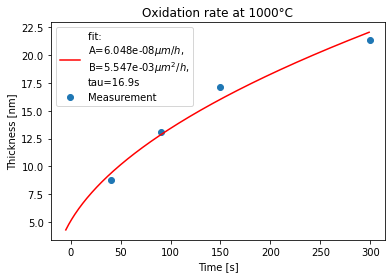

In [11]:
tau = 0.019*3600
A = 0.57*1E3
B = 3.00E-2*1E3
BdA = 5.27E-2*1E3/3600

t = np.arange(-5, 300, 1)

DGM_s = BdA*(t+tau) # for short time approxiamtion 
DGM_l = np.sqrt(B*(t+tau)) # for long time approximation 
fig, ax = plt.subplots()

ax.scatter(Time,Thickness,label="Measurement")

A, B, tau = popt
ax.plot(t, 1e9*dealGrove(t, *popt), 'r-',
         label='fit: \nA={:.3e}$\mu m/h$,\nB={:.3e}$\mu m^2/h$,\ntau={:.1f}s'.format(
             A*1e6*3600, B*1e6*1e6*3600, tau
         ))

#ax.plot(t, 1e9*dealGrove(t, 0.00000002,0.000000000000000003,10))
#ax.plot(t, DGM_s,label="Short Time Approx.")
#ax.plot(t, DGM_l,label="Short Time Approx.")

plt.legend()

#plt.ylim((0,22))
#plt.xlim((-5,310))
plt.xlabel("Time [s]")
plt.ylabel("Thickness [nm]")
plt.title("Oxidation rate at 1000°C")

In [12]:
A, B, tau = popt
print("A: {}m/s = {}um/h".format(A, A*1e6*3600))
print("B: {}m^2/s = {}um^2/h".format(B, B*1e6*3600*1e6))
print("tau: {}s".format(tau))

A: 1.680008686672e-17m/s = 6.048031272019199e-08um/h
B: 1.5409686091794052e-18m^2/s = 0.005547486993045859um^2/h
tau: 16.92808177865283s


In [13]:
from scipy.constants import k,e
T=1000+273.15
C1= 7.72e2
E1 = 1.23*e
C2 = 3.71e6
E2 = 2*e

B = C1*np.exp(-E1/(k*T)) #in \mu m² /h
BdA = C2*np.exp(-E2/(k*T)) #in \mu m /h

A = B/BdA

print("A: {} $\mu m/h$;B: {}$\mu m^2/h$".format(A, B))

A: 0.23243247337637804 $\mu m/h$;B: 0.01043875876744057$\mu m^2/h$
